['CATAID', 'ELLIPTICAL', 'ELLIPTICAL_CODE', 'HUBBLE_TYPE_SPD', 'HUBBLE_TYPE_SPD_CODE', 'HUBBLE_TYPE_LSK', 'HUBBLE_TYPE_LSK_CODE', 'HUBBLE_TYPE_ASGR', 'HUBBLE_TYPE_ASGR_CODE', 'HUBBLE_TYPE', 'HUBBLE_TYPE_CODE', 'ASGR_DISTURBED', 'ASGR_NORMAL', 'ASGR_UNSURE', 'ASGR_CLASSIFIERS', 'ASGR_PROBDIST', 'P_EL', 'P_CS', 'P_EL_DEBIASED', 'P_CS_DEBIASED', 'URL_IMG', 'Z_1', 'nQ_1', 'SURVEY_CODE', 'SURVEY_CLASS', 'Z_TONRY_1', 'fluxscale', 'zmax_19p8', 'zmax_19p4', 'zmax_19p0', 'zmax_17p8', 'nbands', 'S2N', 'PPP', 'logmstar', 'dellogmstar', 'logmoverl_i', 'dellogmoverl_i', 'logage', 'dellogage', 'logtau', 'dellogtau', 'logmintsfh', 'dellogmintsfh', 'logmremnants', 'dellogmremnants', 'metal', 'delmetal', 'extBV', 'delextBV', 'logLWage', 'dellogLWage', 'gminusi', 'delgminusi', 'uminusr', 'deluminusr', 'gminusi_stars', 'uminusr_stars', 'C_logM_ur', 'C_logM_gi', 'C_logM_eBV', 'fitphot_u', 'delfitphot_u', 'absmag_u', 'delabsmag_u', 'absmag_u_stars', 'fitphot_g', 'delfitphot_g', 'absmag_g', 'delabsmag_g', '

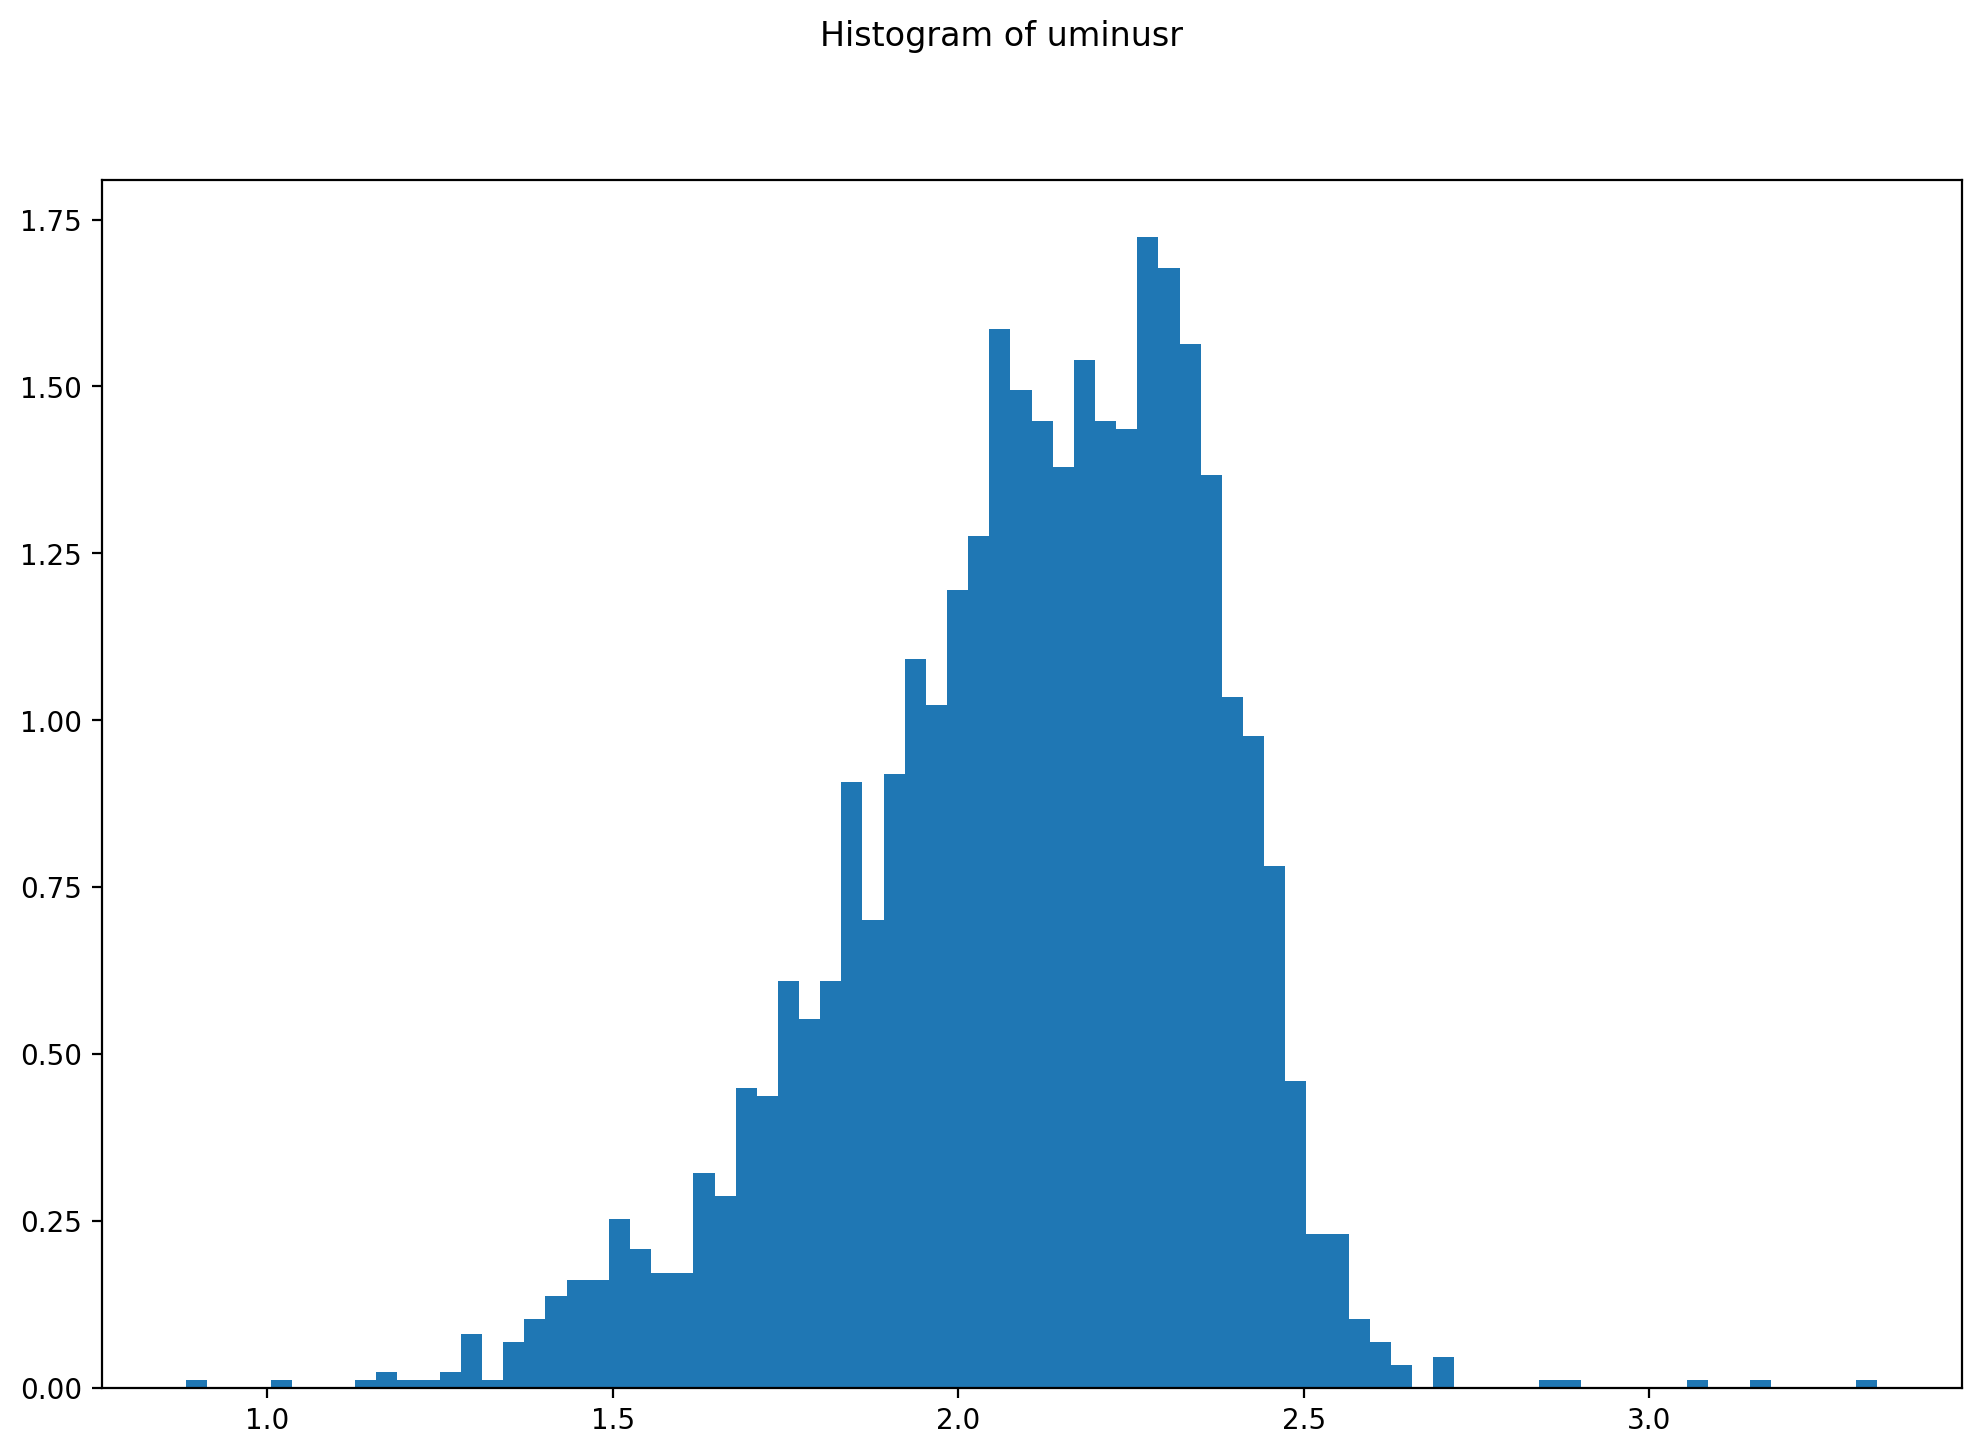

kstest uminusr norm : 0.9095627064860626, 0.0
kstest uminusr norm greater : 0.001593606851391427, 0.9846081953398116
kstest uminusr norm less : 0.9095627064860626, 0.0
Shapiro uminusr 0.972093939781189,3.880496091836628e-23
Anderson uminusr 20.621300938714285,[0.575 0.655 0.786 0.917 1.09 ], [15.  10.   5.   2.5  1. ]

Normal Test on CountInCyl


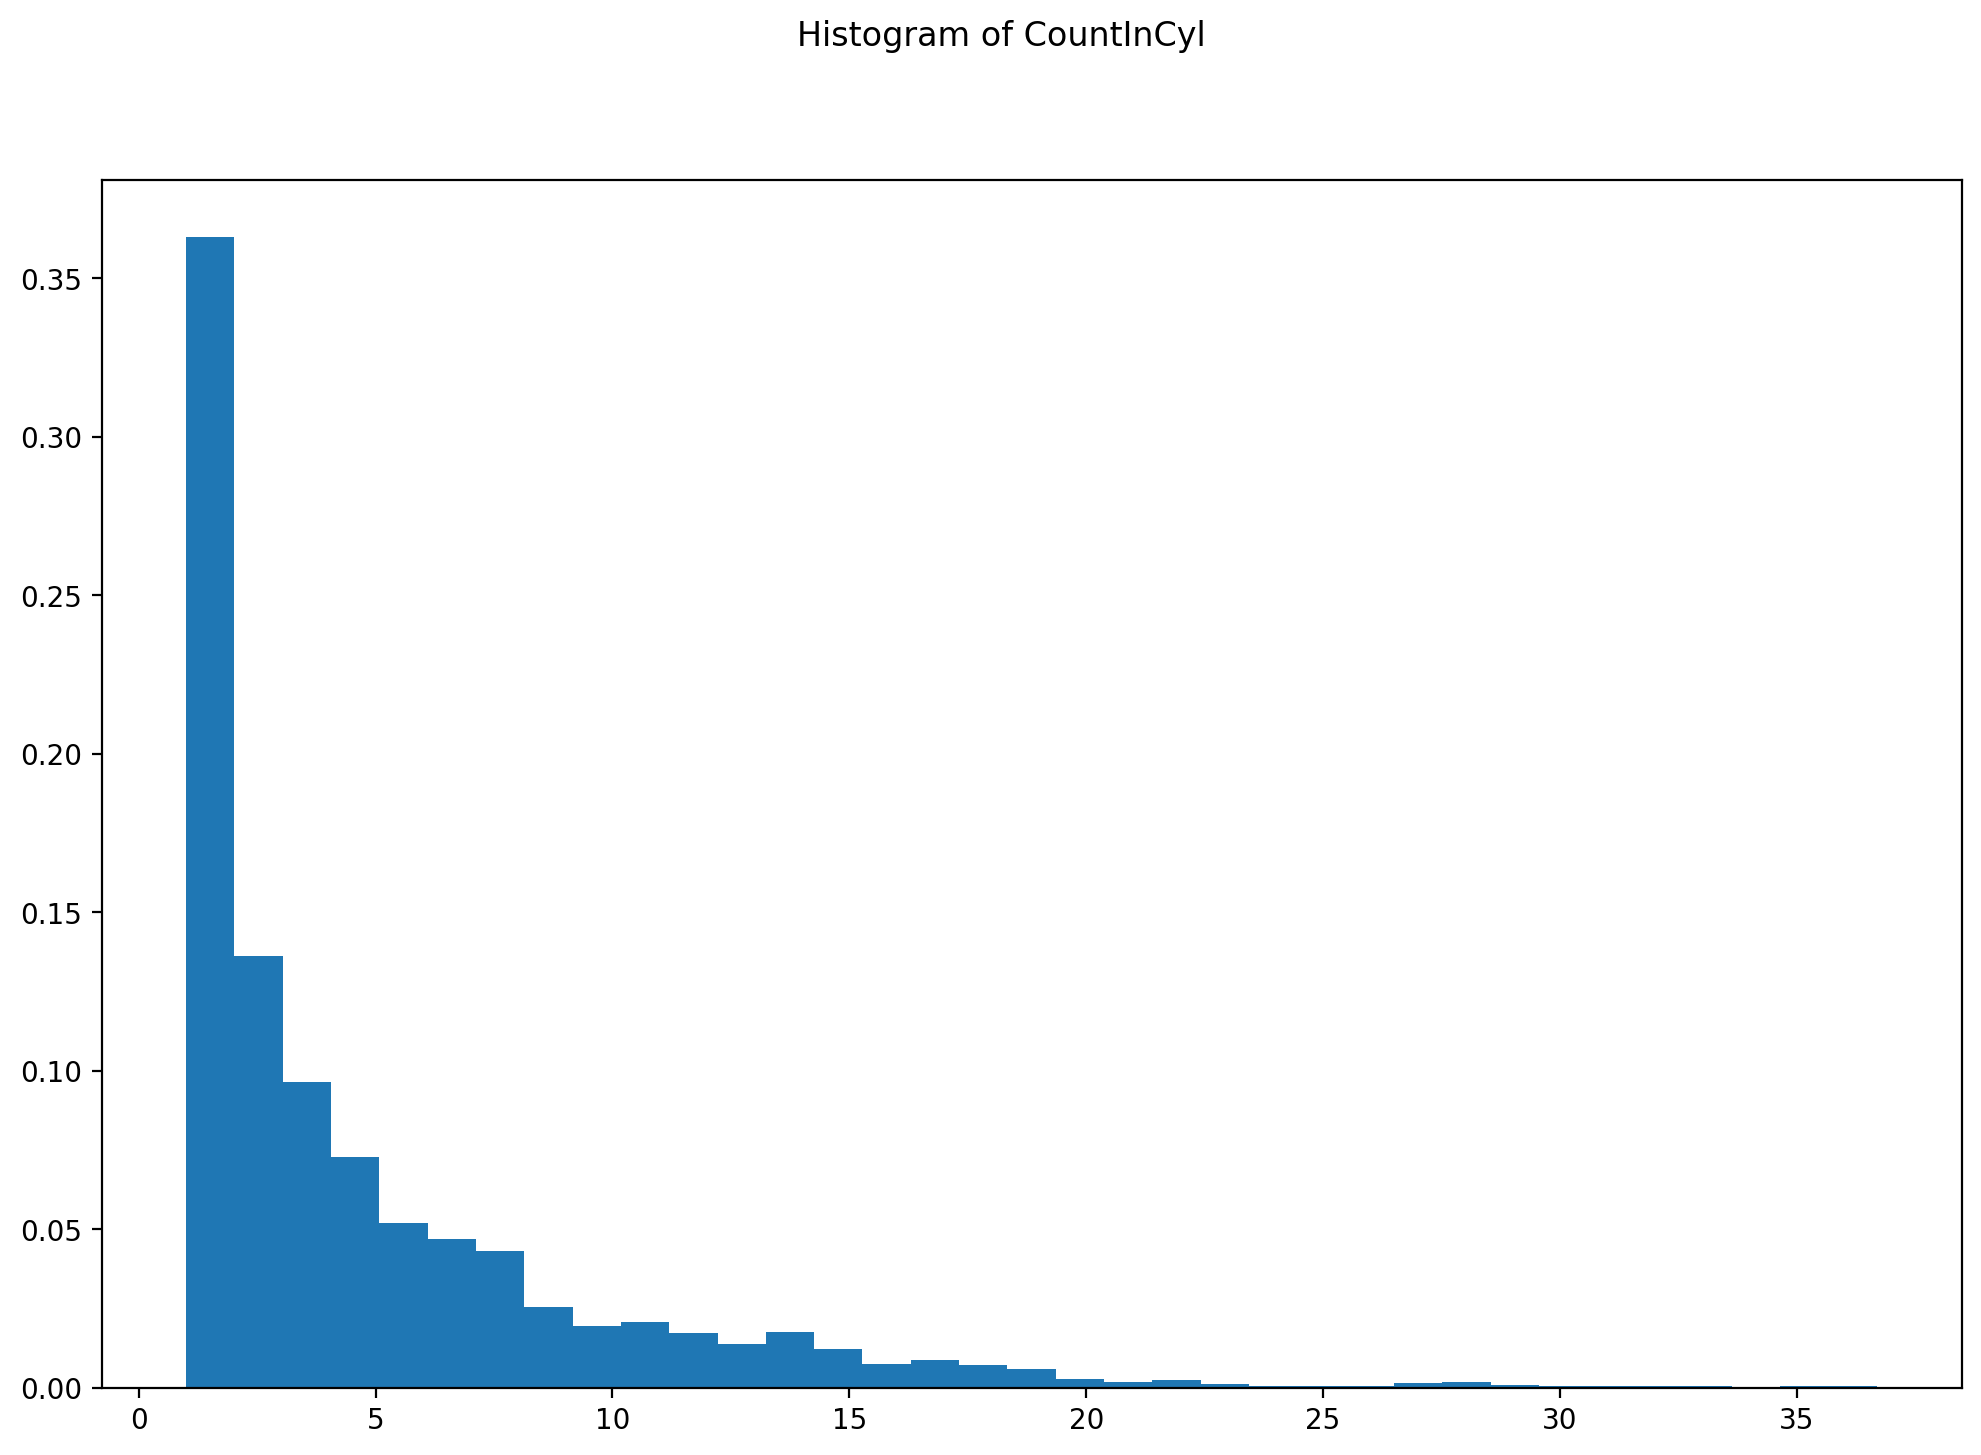

kstest CountInCyl norm : 0.8413447460685429, 0.0
kstest CountInCyl norm greater : 0.0, 1.0
kstest CountInCyl norm less : 0.8413447460685429, 0.0
Shapiro CountInCyl 0.7751150131225586,0.0
Anderson CountInCyl 188.15619978128325,[0.575 0.655 0.786 0.917 1.09 ], [15.  10.   5.   2.5  1. ]

Normal Test on DistanceTo5nn


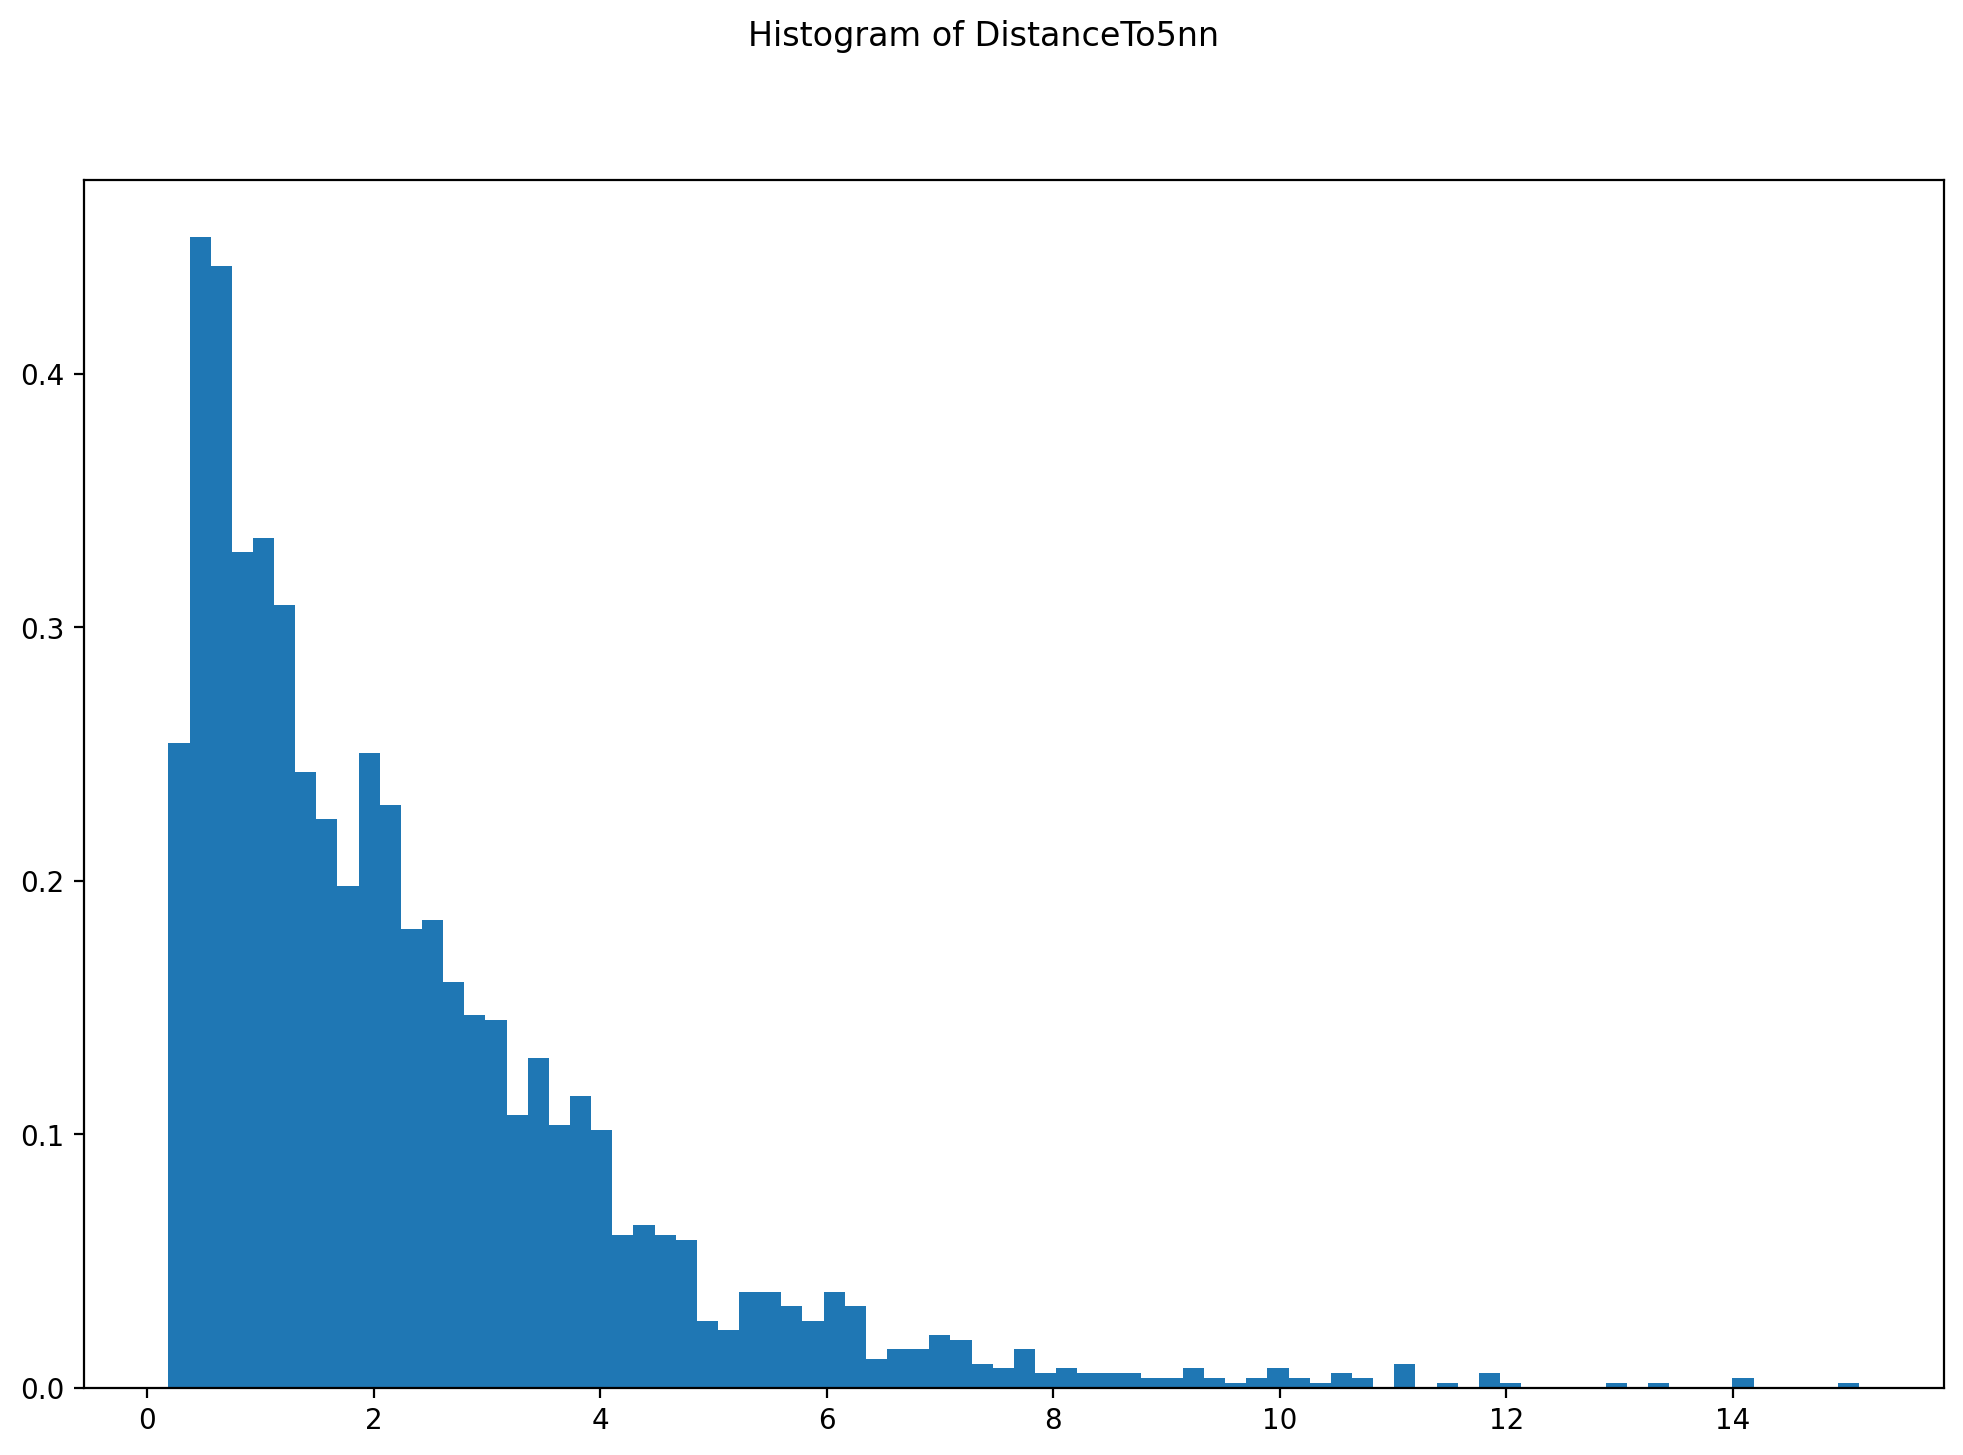

kstest DistanceTo5nn norm : 0.5979946832539413, 0.0
kstest DistanceTo5nn norm greater : 0.0, 1.0
kstest DistanceTo5nn norm less : 0.5979946832539413, 0.0
Shapiro DistanceTo5nn 0.8297164440155029,0.0
Anderson DistanceTo5nn 112.34986006334384,[0.575 0.655 0.786 0.917 1.09 ], [15.  10.   5.   2.5  1. ]

Normal Test on SurfaceDensity


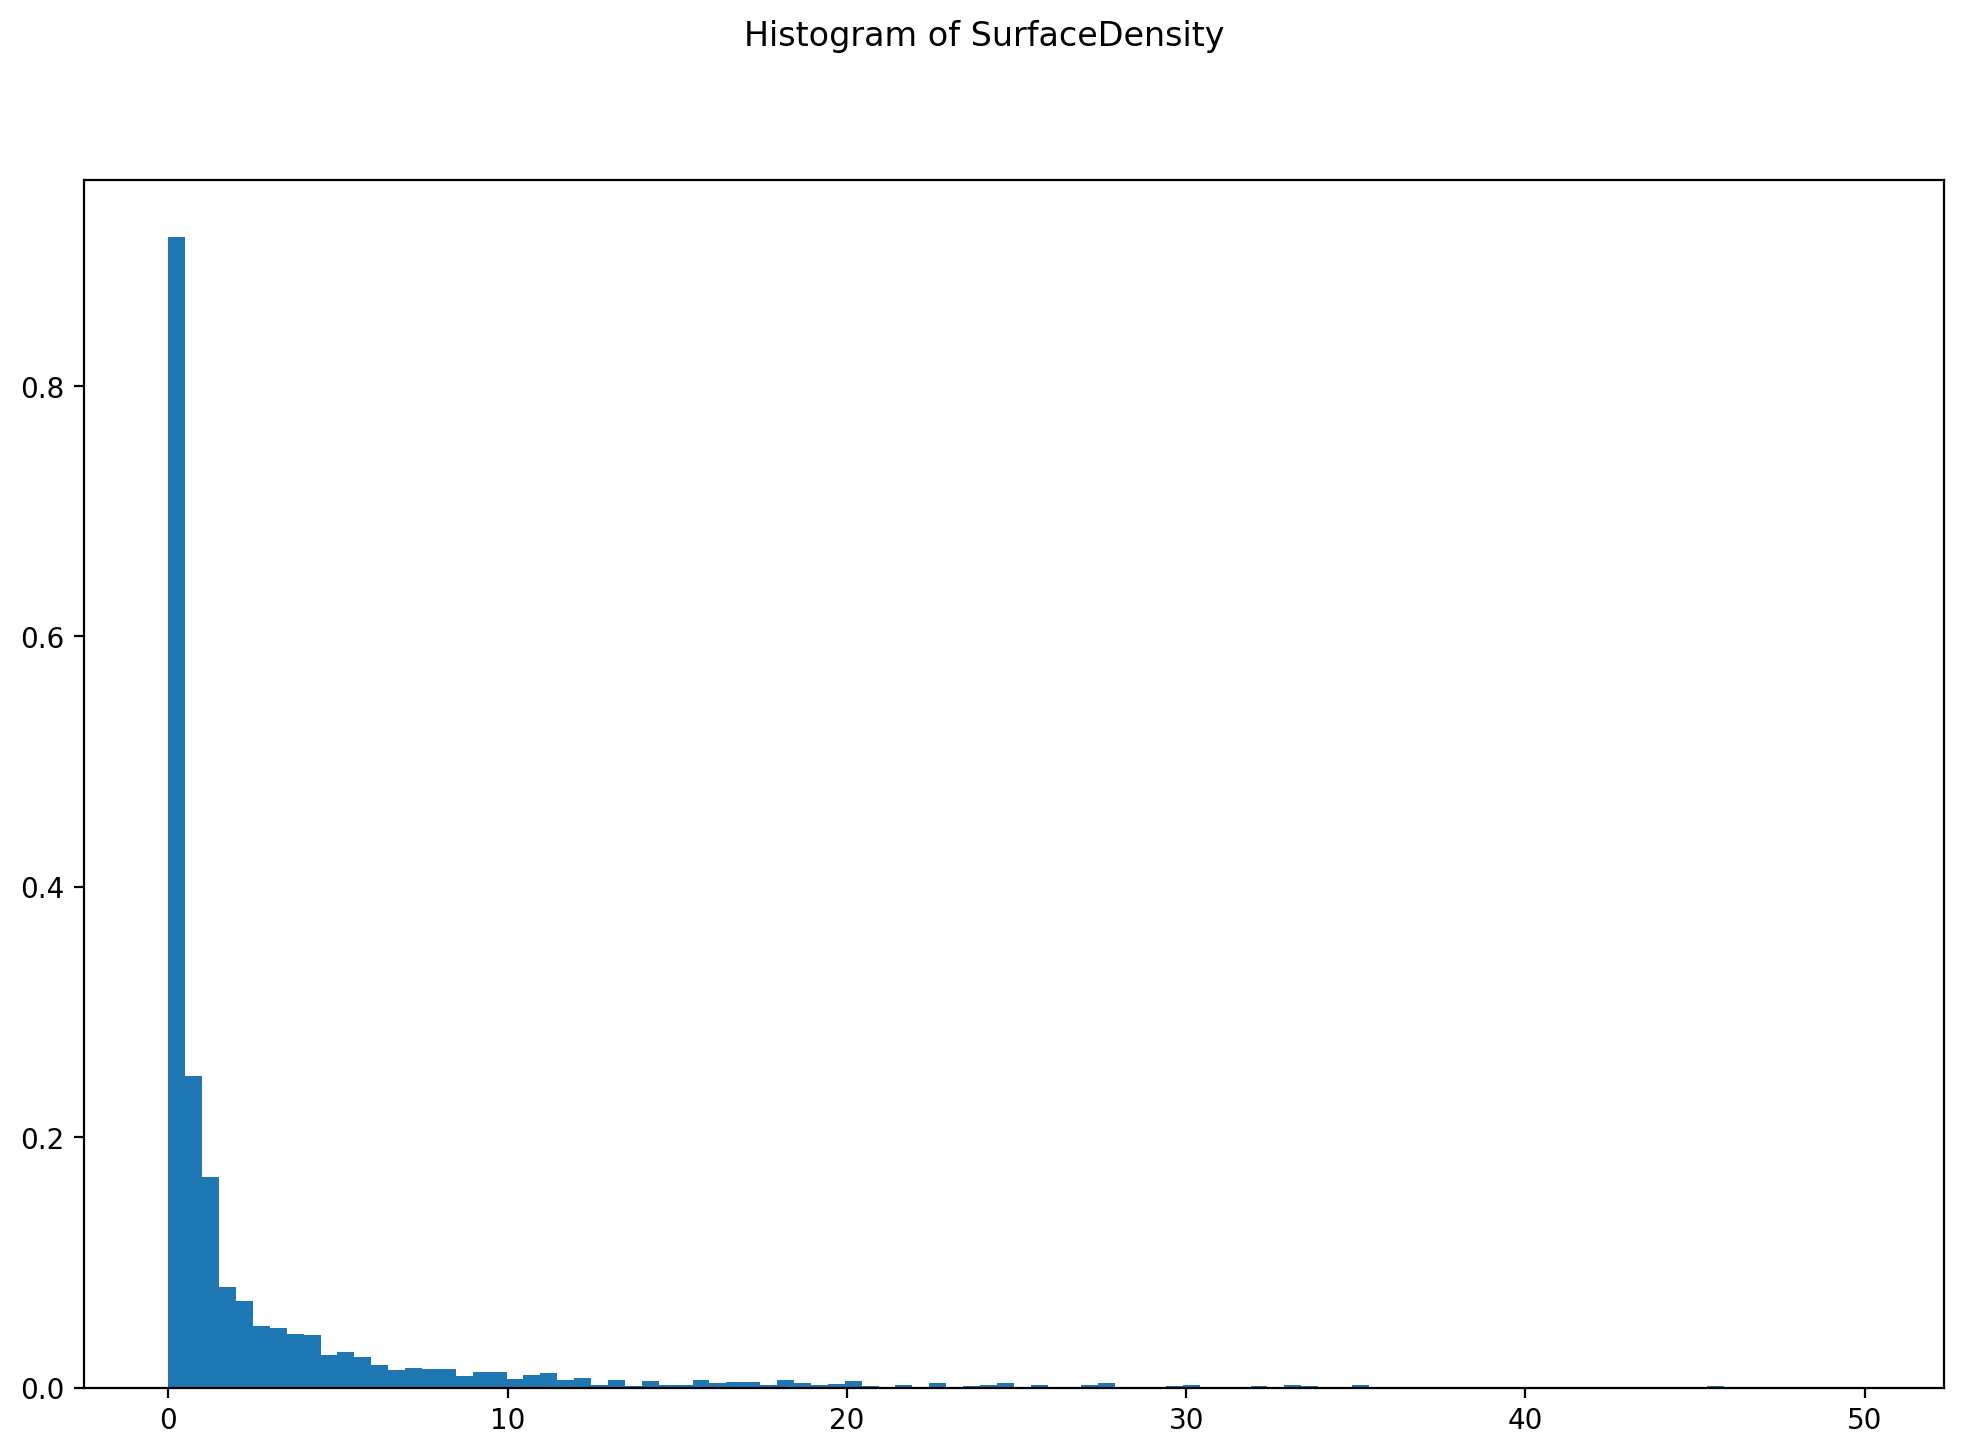

kstest SurfaceDensity norm : 0.501595764942026, 0.0
kstest SurfaceDensity norm greater : 0.0, 1.0
kstest SurfaceDensity norm less : 0.501595764942026, 0.0
Shapiro SurfaceDensity 0.5215516686439514,0.0
Anderson SurfaceDensity 452.4277689370324,[0.575 0.655 0.786 0.917 1.09 ], [15.  10.   5.   2.5  1. ]

Normal Test on AGEDenPar


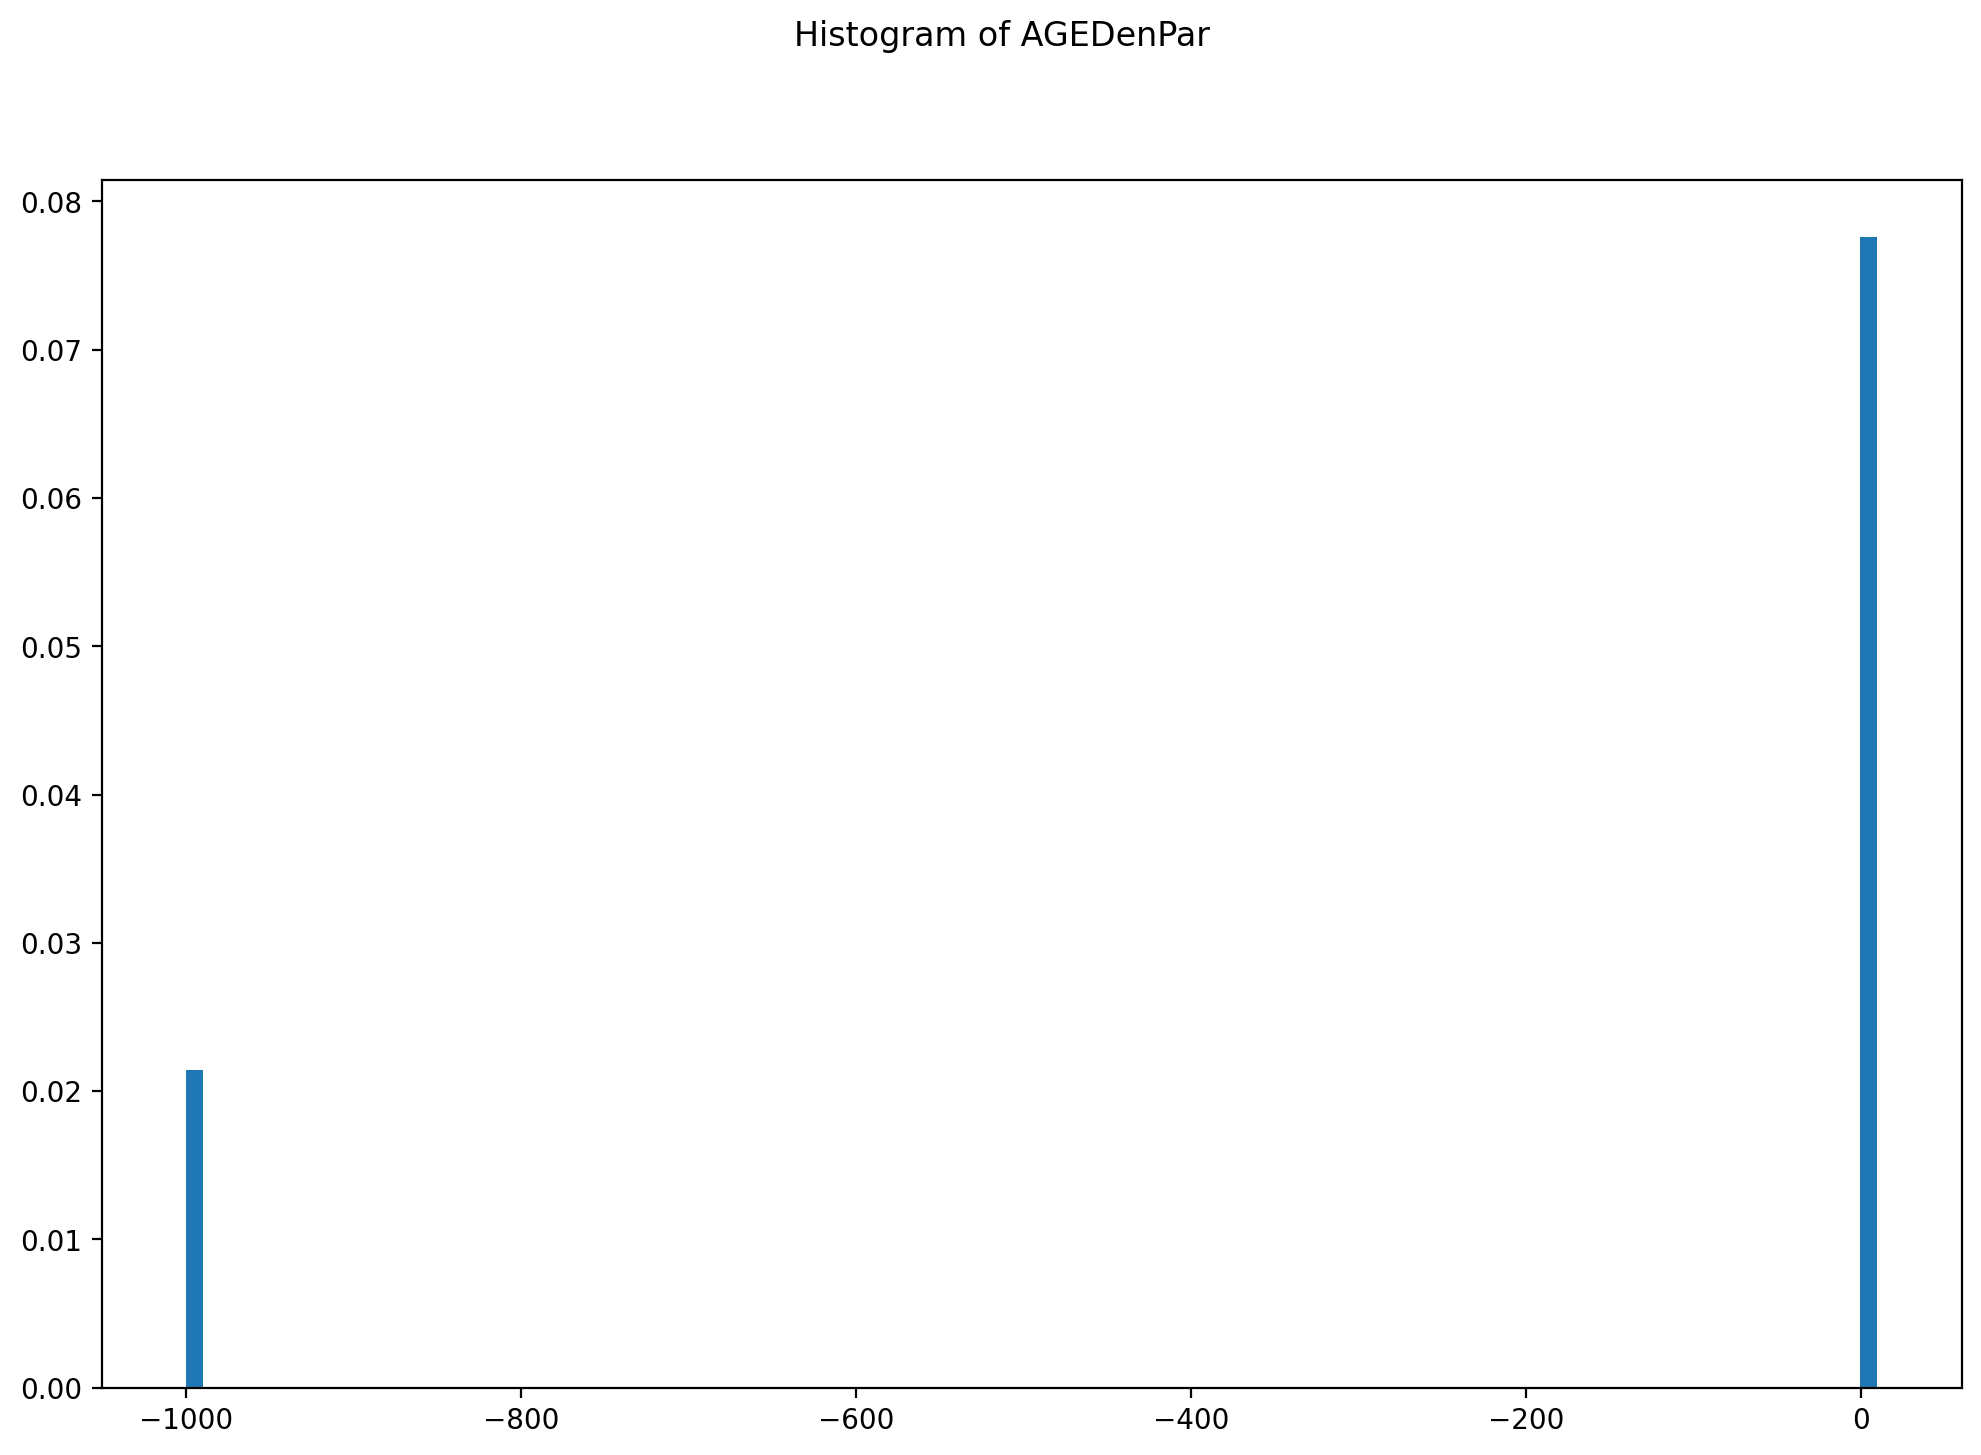

kstest AGEDenPar norm : 0.2843251203112027, 5.147398937172905e-204
kstest AGEDenPar norm greater : 0.21652021089630932, 7.215201515955251e-118
kstest AGEDenPar norm less : 0.2843251203112027, 2.5736994685864524e-204
Shapiro AGEDenPar 0.5099940896034241,0.0
Anderson AGEDenPar 726.998565364016,[0.575 0.655 0.786 0.917 1.09 ], [15.  10.   5.   2.5  1. ]

 Determined Lamda value : CountInCyl : 0.7
Pearson test uminusr versus CountInCyl 0.11209681074299749, 2.030390918482071e-09
Pearson test uminusr versus CountInCyl 0.11209681074299749, 2.030390918482071e-09
 Determined Lamda value : DistanceTo5nn : 0.08776861648708711
Pearson test uminusr versus DistanceTo5nn -0.15502621035434175, 9.132263811802536e-17
 Determined Lamda value : uminusr : 2.4059203758845076
Pearson test uminusr versus uminusr 1.0, 0.0
Pearson test Transformed uminusr versus Transformed DistanceTo5nn -0.15937245388252558, 1.2132000593413763e-17


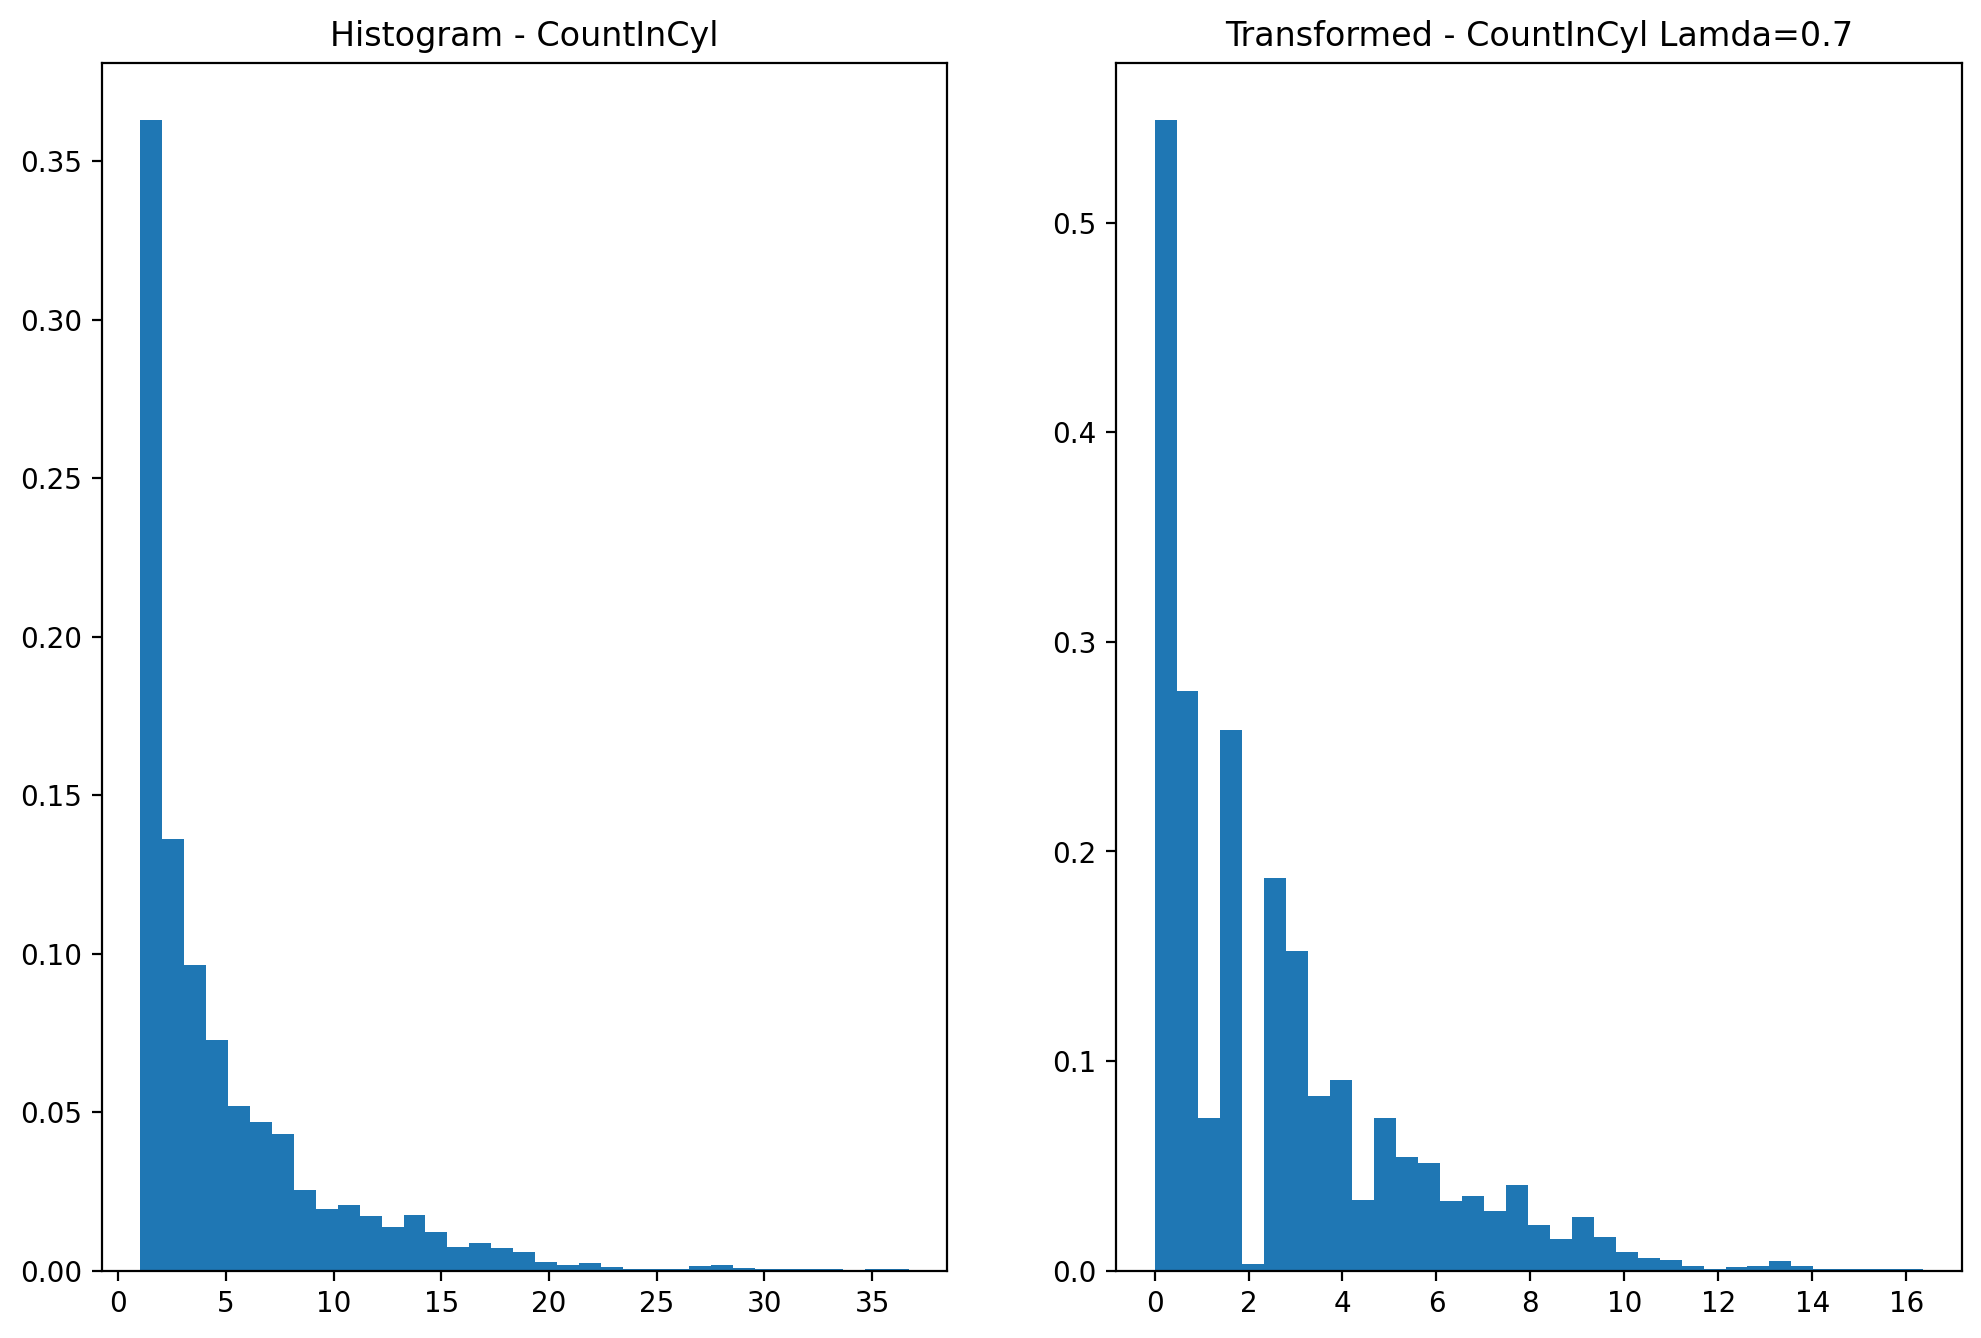

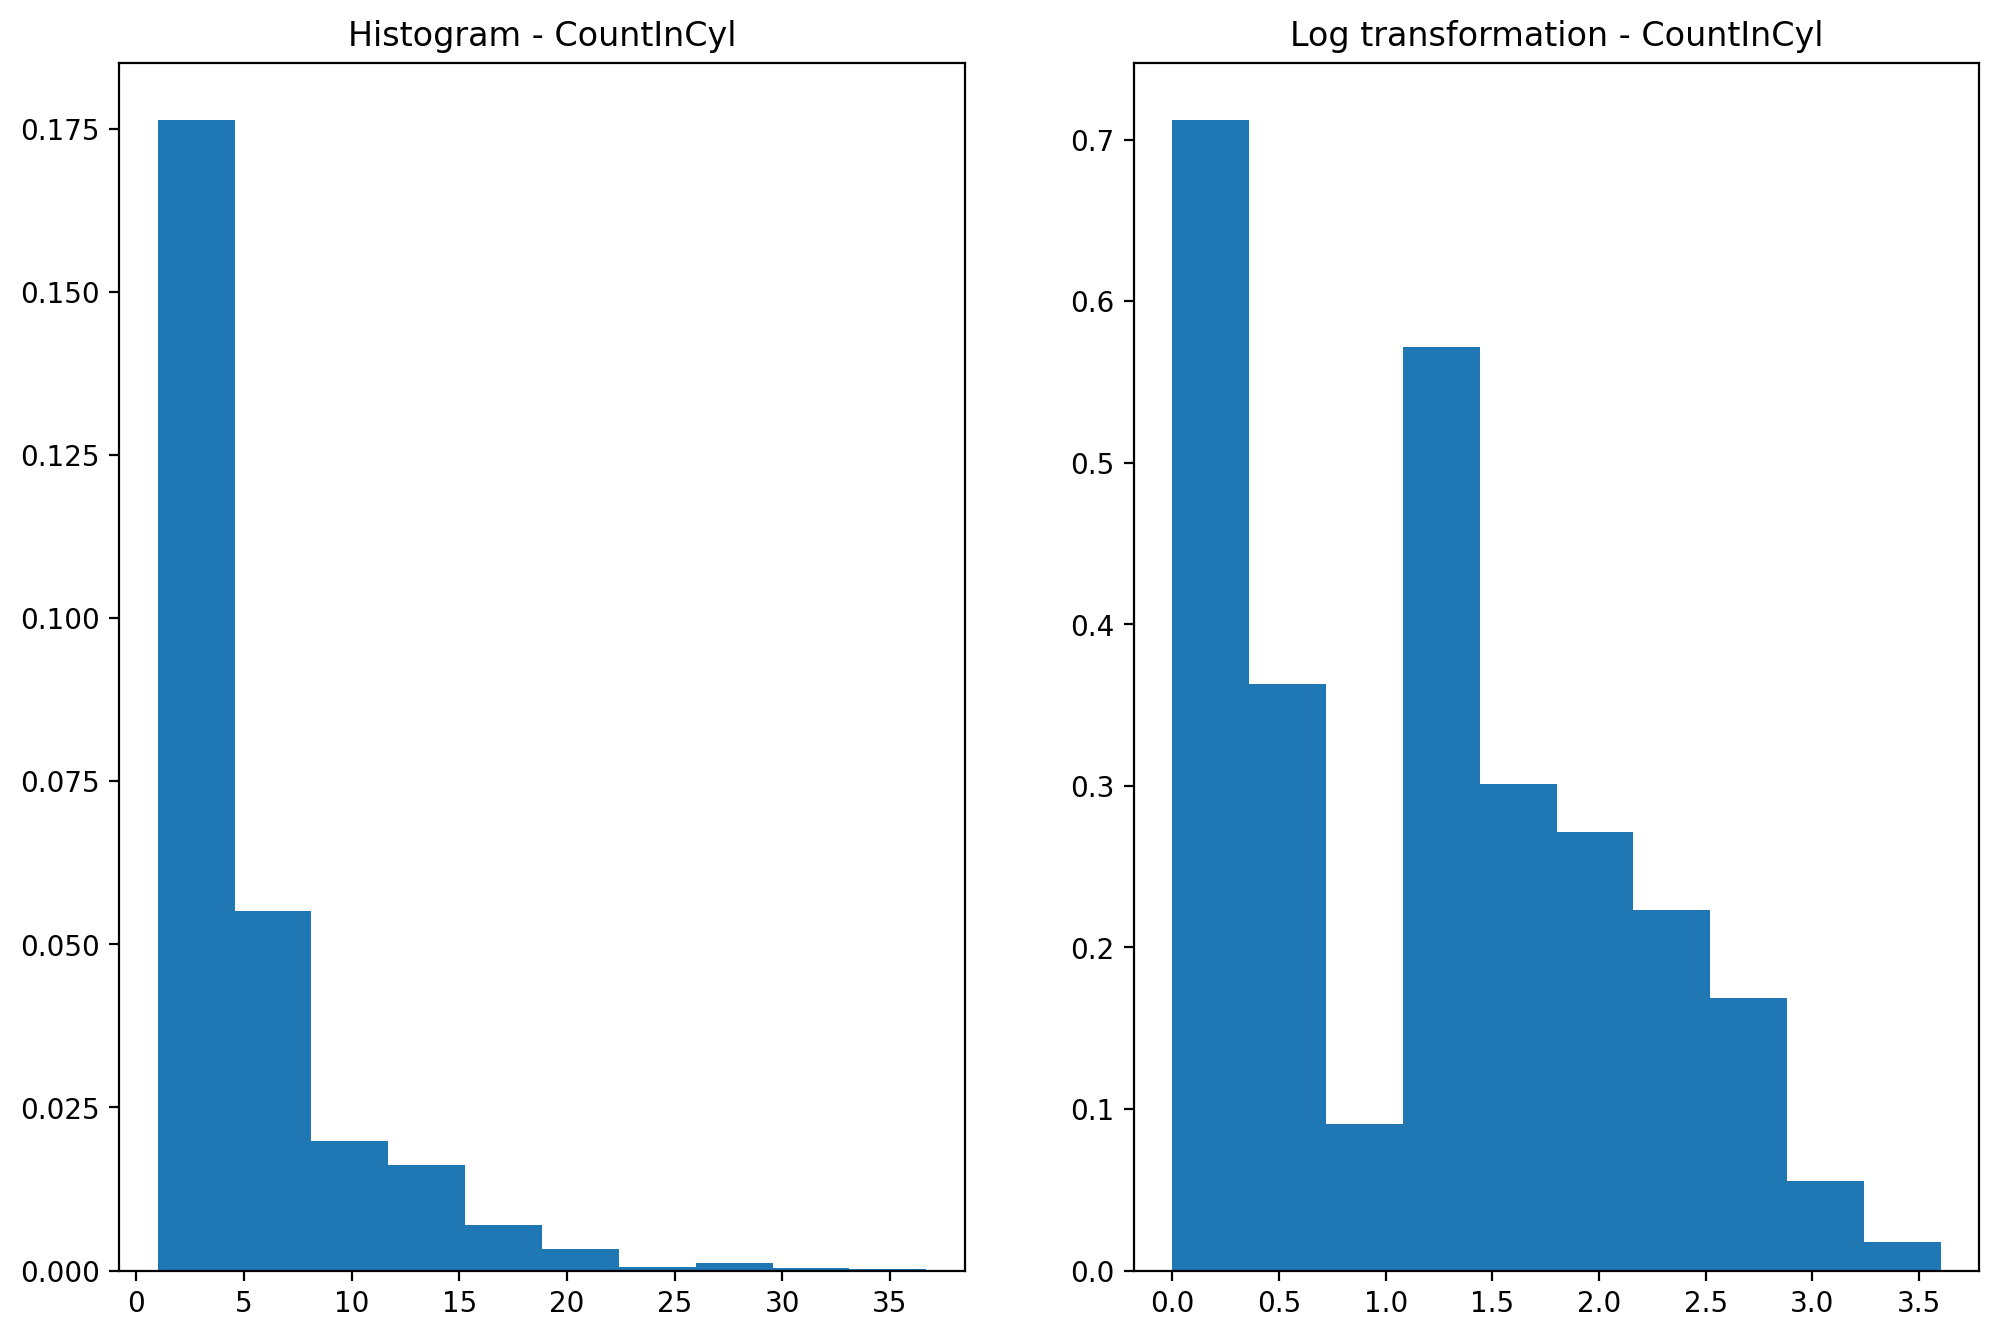

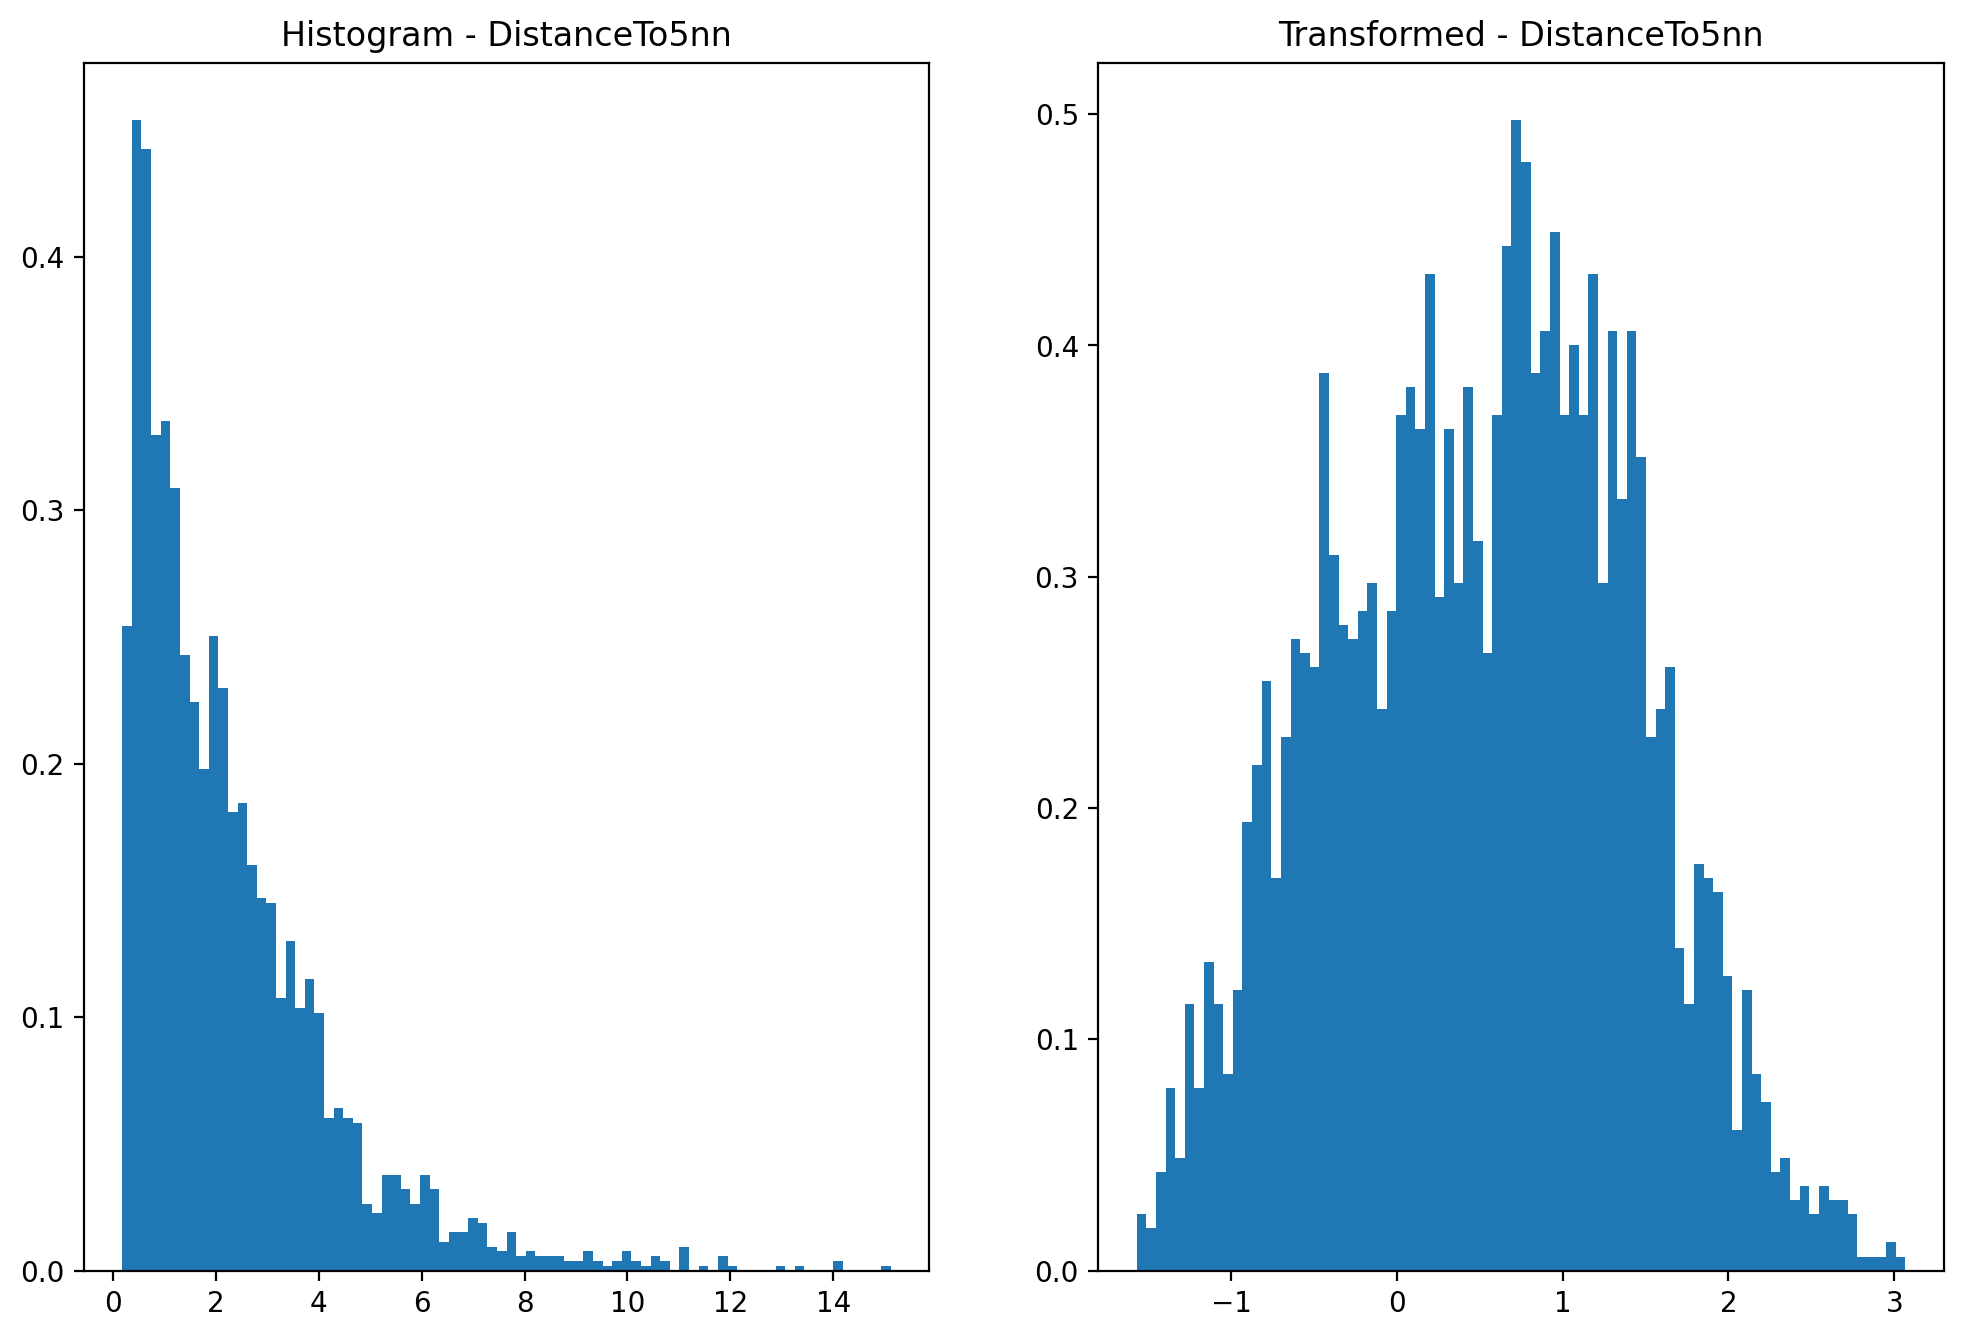

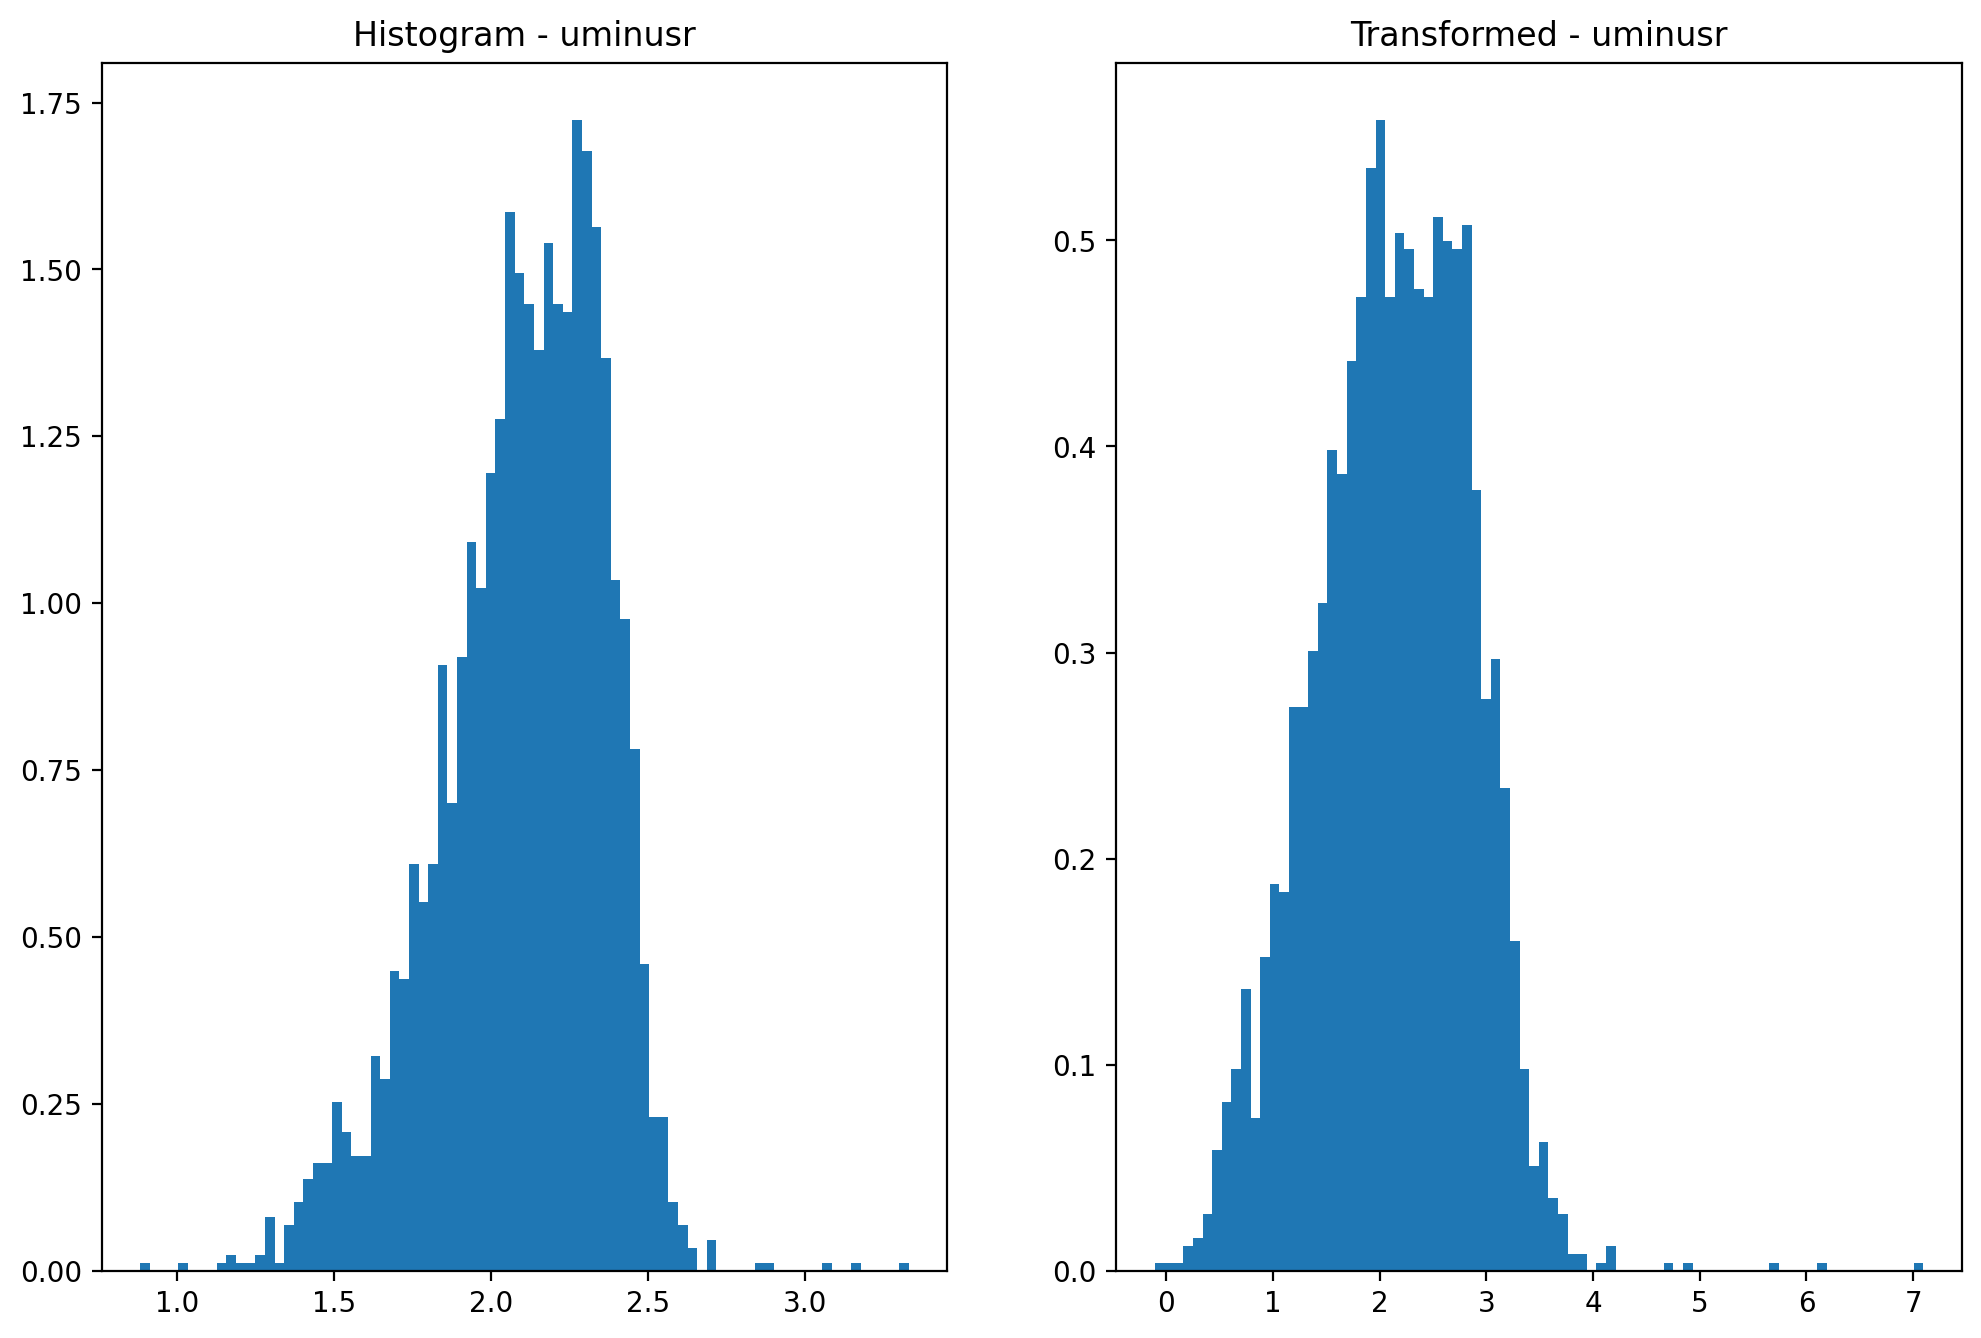

In [3]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from scipy import stats

RawMassEClassEmeasure = Table.read('../../GAMA_Data/EMassEClassEmeasure.fits')
#print(RawMassEClassEmeasure.colnames)
# CLEAN DATA
#REMassEClassEmeasure = RawMassEClassEmeasure[RawMassEClassEmeasure['CountInCyl']> -500]
RErange = RawMassEClassEmeasure[RawMassEClassEmeasure['CountInCyl']> -500]
print(RErange.colnames)
RErange = RErange[RErange['SurfaceDensity'] < 50]
RErange = RErange[RErange['AGEDenParFlag'] < 3]
RErange = RErange[RErange['uminusr']> 0.001]
#RErange = RErange[RErange['uminusr']< 2.7]
#RErange = RErange[RErange['CountInCyl'] > 0]
RErange['CountInCyl'] = RErange['CountInCyl'] + 1

def testNorm(xfield, binCount) :
    
   print('Normal Test on '+xfield)
   fig = plt.figure(figsize=(12, 8), dpi=200)
   fig.suptitle('Histogram of '+xfield)
   ax1 = fig.add_subplot(1, 1, 1)
   
   ax1.hist(RErange[xfield].data, bins=binCount, density=True)
   plt.show() 
   r, p = stats.kstest(RErange[xfield], 'norm')
   print('kstest '+xfield+' norm : ' +str(r)+', '+str(p))
                                  
   r, p = stats.kstest(RErange[xfield], 'norm',alternative='greater')
   print('kstest '+xfield+' norm greater : ' +str(r)+', '+str(p))
                                  
   r, p = stats.stats.kstest(RErange[xfield], 'norm',alternative='less')
   print('kstest '+xfield+' norm less : ' +str(r)+', '+str(p))
    
   r, p = stats.shapiro(RErange[xfield])
   print('Shapiro '+xfield+' '+str(r)+','+str(p))

   s, cl, sl  = stats.anderson(RErange[xfield],'norm')
   print('Anderson '+xfield+' '+str(s)+','+str(cl)+', '+str(sl))
   print() 


def transformNone(xfield, binCount) :
   fig = plt.figure(figsize=(12, 8), dpi=200)
   ax1 = fig.add_subplot(1, 2, 1)
   ax1.title.set_text('Histogram - '+xfield) 
   ax1.hist(RErange[xfield].data, bins=binCount, density=True)
   #ret = stats.boxcox(RErange[xfield],lamda,alpha)
   transdata, lamda = stats.boxcox(RErange[xfield])
   ax2 = fig.add_subplot(1, 2, 2)
   ax2.title.set_text('Transformed - '+xfield)
   ax2.hist(transdata, bins=binCount, density=True)
   print(' Determined Lamda value : '+xfield+' : '+str(lamda))
   r, p = stats.pearsonr(RErange['uminusr'], RErange[xfield])
   print('Pearson test uminusr versus '+xfield+' '+str(r)+', '+str(p))
   return transdata

def transformLamda(xfield, binCount, lamda) :
   fig = plt.figure(figsize=(12, 8), dpi=200)
   ax1 = fig.add_subplot(1, 2, 1)
   ax1.title.set_text('Histogram - '+xfield) 
   ax1.hist(RErange[xfield].data, bins=binCount, density=True)
   #ret = stats.boxcox(RErange[xfield],lamda,alpha)
   transdata = stats.boxcox(RErange[xfield],lamda)
   ax2 = fig.add_subplot(1, 2, 2)
   ax2.title.set_text('Transformed - '+xfield+' Lamda='+str(lamda))
   ax2.hist(transdata, bins=binCount, density=True)
   print(' Determined Lamda value : '+xfield+' : '+str(lamda))
   r, p = stats.pearsonr(RErange['uminusr'], RErange[xfield])
   print('Pearson test uminusr versus '+xfield+' '+str(r)+', '+str(p))    

def transformLog(xfield, binCount) :
   fig = plt.figure(figsize=(12, 8), dpi=200)
   ax1 = fig.add_subplot(1, 2, 1)
   ax1.title.set_text('Histogram - '+xfield) 
   ax1.hist(RErange[xfield].data, bins=binCount, density=True)
   #ret = stats.boxcox(RErange[xfield],lamda,alpha)
   transdata = np.log(RErange[xfield])
   ax2 = fig.add_subplot(1, 2, 2)
   ax2.title.set_text('Log transformation - '+xfield) 
   ax2.hist(transdata, bins=binCount, density=True)
   r, p = stats.pearsonr(RErange['uminusr'], RErange[xfield])
   print('Pearson test uminusr versus '+xfield+' '+str(r)+', '+str(p))   
    
testNorm('uminusr',80)
testNorm('CountInCyl',35)
testNorm('DistanceTo5nn',80)
testNorm('SurfaceDensity',100)
testNorm('AGEDenPar',100)

transformLamda('CountInCyl', 35, 0.7)
transformLog('CountInCyl', 10)
T_DistanceTo5nn = transformNone('DistanceTo5nn',80)
T_uminusr = transformNone('uminusr',80)

r, p = stats.pearsonr(T_uminusr,T_DistanceTo5nn)
print('Pearson test Transformed uminusr versus Transformed DistanceTo5nn '+str(r)+', '+str(p))   

plt.show()


